**Evaluación 4**

Caso: TweetsClasificacion

Notebook basado en el trabajo entregado por los alumnos Michell Miranda/ Denisse Alcántara/ Diego Concha

Asignatura: DEEP LEARNING - DLY0100 -002V

Docente: Jorge Anais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from matplotlib.patches import Rectangle, Circle

In [2]:
# Configurar TensorFlow para utilizar GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv(
    "/content/drive/MyDrive/2023-1/DLY0100/notebooks/ev4_jorge/TweetsClasificacion.csv",
    names=['sentimientos', 'comentarios'],
    sep=';',
)

# Carga de datos

In [5]:
# Mapear los sentimientos a valores numéricos
label_encoder = LabelEncoder()
data['sentimientos'] = label_encoder.fit_transform(data['sentimientos'])

In [6]:
# Preprocesamiento de los datos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['comentarios'])
sequences = tokenizer.texts_to_sequences(data['comentarios'])
padded_sequences = pad_sequences(sequences)

In [7]:
# Dividir los datos en entrenamiento y prueba
X = padded_sequences
y = data['sentimientos']
num_classes = len(set(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)


COMENTARIO PROFESOR

In [ ]:
# train_size = int(0.8 * len(X))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# Para evitar el desbalance de datos mejor hacer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

FIN COMENTARIO PROFESOR

# Red Recurrente LSTM

In [10]:
model = Sequential()
model = Sequential()
model.add(
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=100,
        input_length=X.shape[1]
    )
)
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compilar y entrenar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 52, 100)           40291300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 40,408,806
Trainable params: 40,408,806
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
8750/8750 [==============================] - 228s 25ms/step - loss: 0.4043 - accuracy: 0.8149 - val_loss: 0.3791 - val_accuracy: 0.8286
Epoch 2/10
8750/8750 [==============================] - 182s 21ms/step - loss: 0.3230 - accuracy: 0.8590 - val_loss: 0.3815 - val_accuracy: 0.8292
Epoch 3/10
8750/8750 [==============================] - 180s 21ms/step - loss: 0.2634 - accuracy: 0.8882 - val_loss: 0.4139 - val_accuracy: 0.8208
Epoch 4/10
8750/8750 [==============================] - 165s 19ms/step - loss: 0.2146 - accuracy: 0.9103 - val_loss: 0.4577 - val_accuracy: 0.8142
Epoch 5/10
8750/8750 [==============================] - 156s 18ms/step - loss: 0.1805 - accuracy: 0.9248 - val_loss: 0.5265 - val_accuracy: 0.8088
Epoch 6/10
8750/8750 [==============================] - 166s 19ms/step - loss: 0.1556 - accuracy: 0.9356 - val_loss: 0.6079 - val_accuracy: 0.8014
Epoch 7/10
8750/8750 [==============================] - 166s 19ms/step - loss: 0.1358 - accuracy: 0.9443 - val_loss: 0

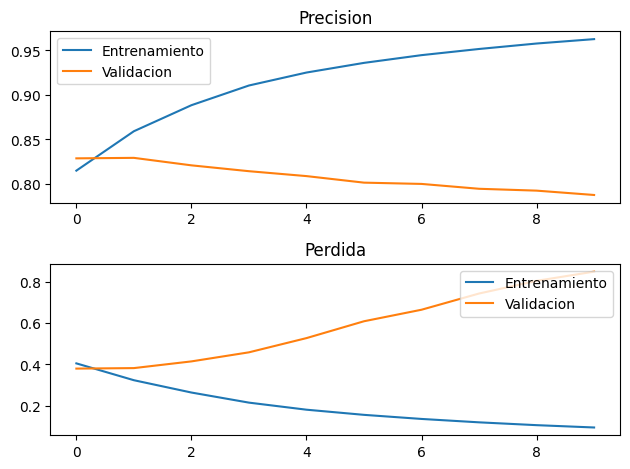

In [12]:
plt.subplot(211)
plt.title('Precision')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.legend(loc='upper left')

plt.subplot(212)
plt.title('Perdida')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Red recurrente LSTM bidireccional

In [ ]:
# RNN LSTM bidireccional
model_bi = Sequential()
model_bi.add(
    Embedding(
        input_dim=len(tokenizer.word_index) + 1,\
        output_dim=100,
        input_length=X.shape[1]
    )
)
model_bi.add(Bidirectional(LSTM(128)))
model_bi.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compilar el modelo
model_bi.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_bi.summary()

In [ ]:
history_bi = model_bi.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

In [ ]:
plt.subplot(211)
plt.title('Precision')
plt.plot(history_bi.history['accuracy'], label='Entrenamiento')
plt.plot(history_bi.history['val_accuracy'], label='Validacion')
plt.legend(loc='upper left')

plt.subplot(212)
plt.title('Perdida')
plt.plot(history_bi.history['loss'], label='Entrenamiento')
plt.plot(history_bi.history['val_loss'], label='Validacion')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()